# Sparse Hebbian Learning : reproducing SparseNet

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%run setup.py --long-description

Reproducible research : Python implementation of SparseHebbianLearning


.. image:: assc.png
   :scale: 100%
   :alt: Set of RFs after aSSC learning.
 

Object
------

* This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the SparseNet algorithm from Bruno Olshausen (http://redwood.berkeley.edu/bruno/sparsenet/).

* this has been published as Perrinet, Neural Computation (2010) (see  http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl )::

   @article{Perrinet10shl,
        Author = {Perrinet, Laurent U.},
        Title = {Role of homeostasis in learning sparse representations},
        Year = {2010}
        Url = {http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl},
        Doi = {10.1162/neco.2010.05-08-795},
        Journal = {Neural Computation},
        Volume = {22},
        Number = {7},
        Keywords = {Neural population coding, Unsupervised learning, St

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 3

## different learning rates

Extracting data...Mdn_for135.jpg, Bda_art1367.jpg, Bdn_objn35.jpg, Fdn_open5.jpg, Mdn_natu696.jpg, Fda_art1486.jpg, Mda_art545.jpg, Fdn_land290.jpg, Hdn_objn36.jpg, Hda_obj2.jpg, Fda_A673086.jpg, Mdn_nat1196.jpg, Hdn_natu729.jpg, Hdn_N115056.jpg, Bdn_land375.jpg, Bdn_land377.jpg, Fdn_open2.jpg, Fda_art1394.jpg, Bdn_text64.jpg, Mdn_land94.jpg, Hdn_objn190.jpg, Hdn_natu337.jpg, Fdn_open14.jpg, Bda_int30.jpg, Hda_obj345.jpg, Mdn_N328025.jpg, Mdn_N344038.jpg, Mdn_text45.jpg, Mdn_for68.jpg, Fdn_bea25.jpg, Fda_A462040.jpg, Fda_art36.jpg, Bdn_text1.jpg, Hda_obj394.jpg, Mdn_nat389.jpg, Fda_A277094.jpg, Mda_art517.jpg, Mda_art675.jpg, Mdn_N228077.jpg, Fdn_text26.jpg, Hdn_objn23.jpg, Fdn_open7.jpg, Mda_urb951.jpg, Bda_art1175.jpg, Bdn_text106.jpg, Bda_art629.jpg, Bdn_for23.jpg, Bda_art1147.jpg, Mda_archi37.jpg, Hda_obj110.jpg, Bda_int741.jpg, Hdn_objn27.jpg, Bda_art1067.jpg, Bda_art1288.jpg, Mdn_land82.jpg, Mdn_N347002.jpg, Bdn_text15.jpg, Bda_room451.jpg

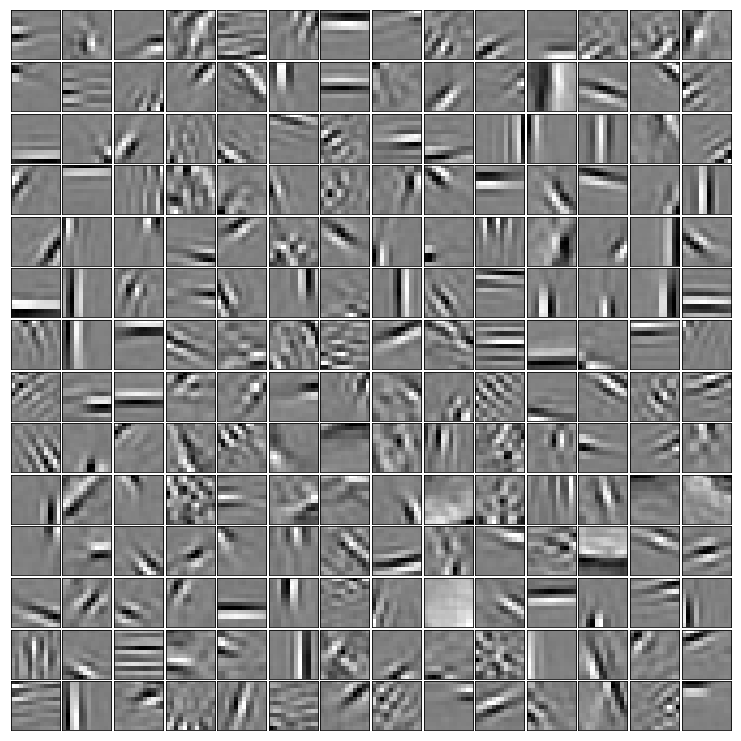

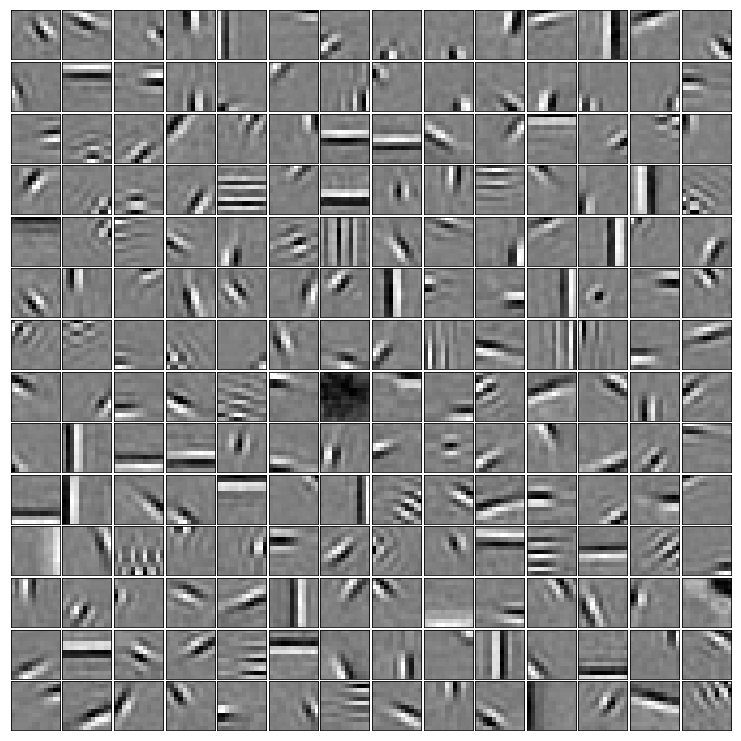

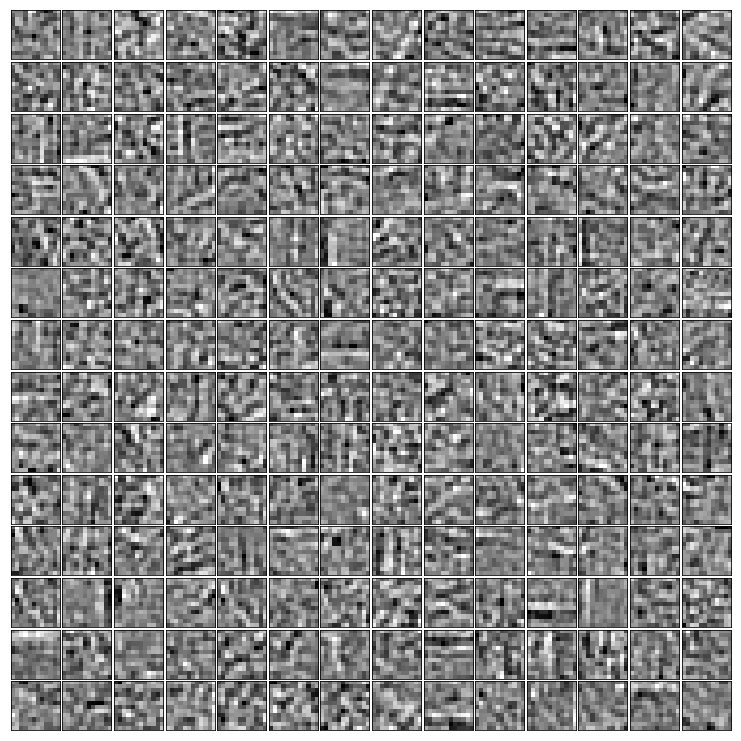

In [4]:
shl = SHL()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta=eta, verbose=verbose)
    dico = shl.learn_dico()
    _ = shl.show_dico(dico)

Extracting data...Fdn_open5.jpg, Bda_int78.jpg, Mdn_N251013.jpg, Bda_room28.jpg, Bda_art923.jpg, Fdn_open7.jpg, Fdn_bea25.jpg, Hdn_text6.jpg, Bda_art1111.jpg, Fdn_nat155.jpg, Hda_obj298.jpg, Bda_room454.jpg, Mdn_N328009.jpg, Bda_gre298.jpg, Hdn_objn35.jpg, Mdn_for135.jpg, Hdn_objn113.jpg, Hdn_N124058.jpg, Mda_art599.jpg, Mda_archi277.jpg, Hdn_objn200.jpg, Bda_int767.jpg, Fdn_open2.jpg, Hda_int314.jpg, Hdn_objn25.jpg, Hda_int457.jpg, Hda_obj404.jpg, Mda_archi215.jpg, Mdn_nat367.jpg, Hda_obj296.jpg, Mda_gre90.jpg, Hdn_N124002.jpg, Mda_hous31.jpg, Mdn_N228077.jpg, Hdn_natu729.jpg, Fdn_land362.jpg, Mda_gre189.jpg, Fda_obj230.jpg, Mdn_N328089.jpg, Bda_room40.jpg, Mdn_nat1253.jpg, Fda_urb752.jpg, Fdn_land805.jpg, Mda_archi100.jpg, Mda_art450.jpg, Bda_int753.jpg, Mdn_nat164.jpg, Mda_art438.jpg, Bda_art671.jpg, Mda_urb324.jpg, Mdn_land760.jpg, Bda_int741.jpg, Mdn_land53.jpg, Bda_room452.jpg, Hdn_objn47.jpg, Bda_art1067.jpg, Mda_archi303.jpg, Bdn_land378

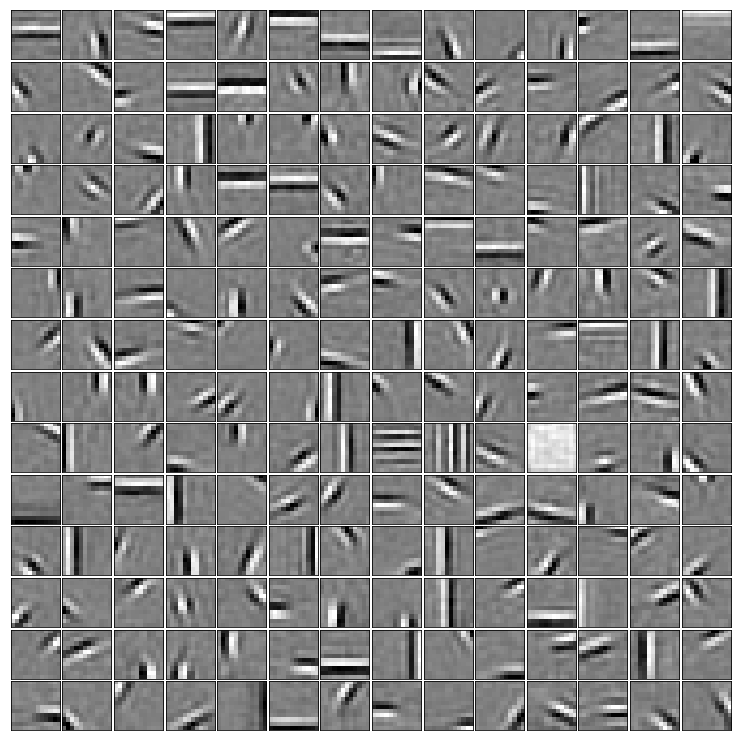

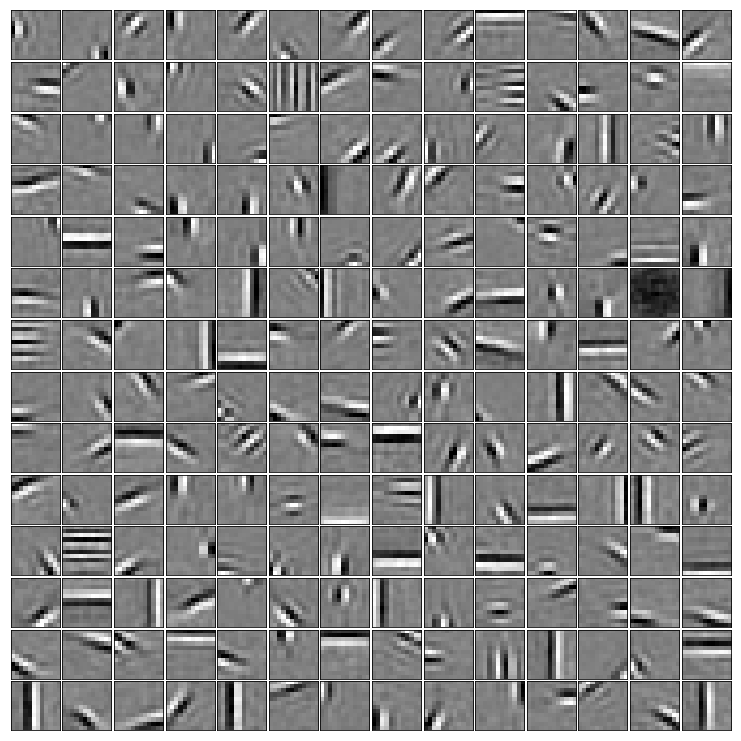

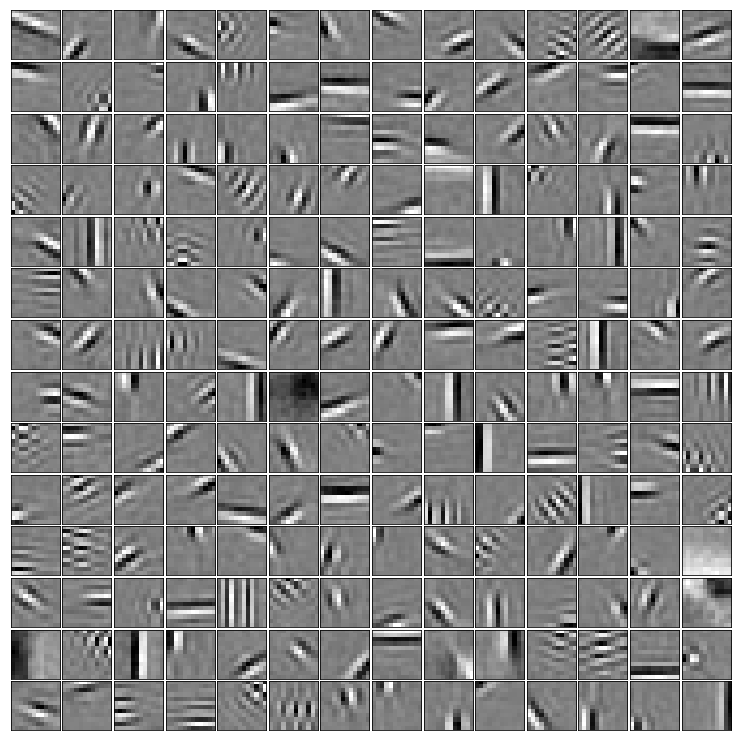

In [5]:
for l0_sparseness in np.logspace(3, 5, N_scan, base=2):
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', l0_sparseness=l0_sparseness, verbose=verbose)
    dico = shl.learn_dico()
    _ = shl.show_dico(dico)

## Without homeostasis

Here,we only ensure the norm ofthe filters is constant.

Extracting data...Fdn_open21.jpg, Fda_A517086.jpg, Mdn_nat389.jpg, Bdn_land859.jpg, Bdn_land810.jpg, Fda_A683031.jpg, Bdn_text2.jpg, Hdn_objn32.jpg, Mdn_N344067.jpg, Hda_obj1.jpg, Hda_room425.jpg, Bdn_nat267.jpg, Bdn_text19.jpg, Mdn_text113.jpg, Bda_room452.jpg, Hda_obj296.jpg, Fda_art1684.jpg, Mda_city21.jpg, Fda_arnat64.jpg, Fdn_nat155.jpg, Hdn_objn33.jpg, Fdn_land805.jpg, Hdn_objn180.jpg, Hda_obj88.jpg, Hda_int314.jpg, Mda_gre199.jpg, Fdn_nat168.jpg, Fda_obj230.jpg, Hda_obj92.jpg, Bdn_natu5.jpg, Bda_room28.jpg, Mda_urb230.jpg, Fdn_open12.jpg, Mda_art242.jpg, Mdn_nat634.jpg, Bdn_text15.jpg, Fdn_land290.jpg, Mda_urb562.jpg, Fda_A463036.jpg, Mda_art1665.jpg, Mdn_N328009.jpg, Fda_art1486.jpg, Mda_art7.jpg, Fdn_land12.jpg, Mda_arnat70.jpg, Hdn_objn66.jpg, Hda_obj96.jpg, Fda_urb306.jpg, Fda_urb794.jpg, Hdn_objn227.jpg, Mdn_for22.jpg, Hda_obj99.jpg, Hda_obj144.jpg, Fda_art1464.jpg, Bdn_natu133.jpg, Fdn_open14.jpg, Bda_enc89.jpg, Mdn_land159.jpg, Mdn

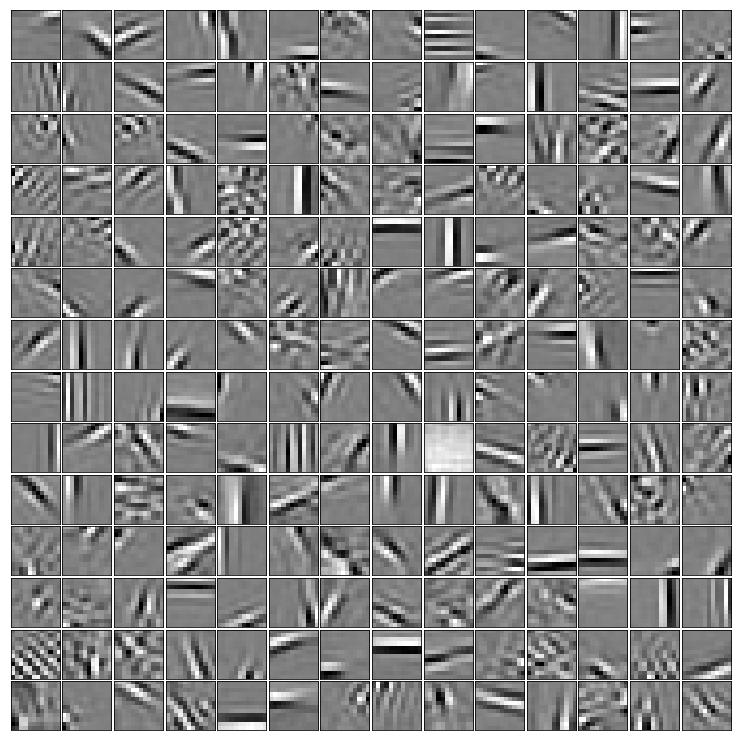

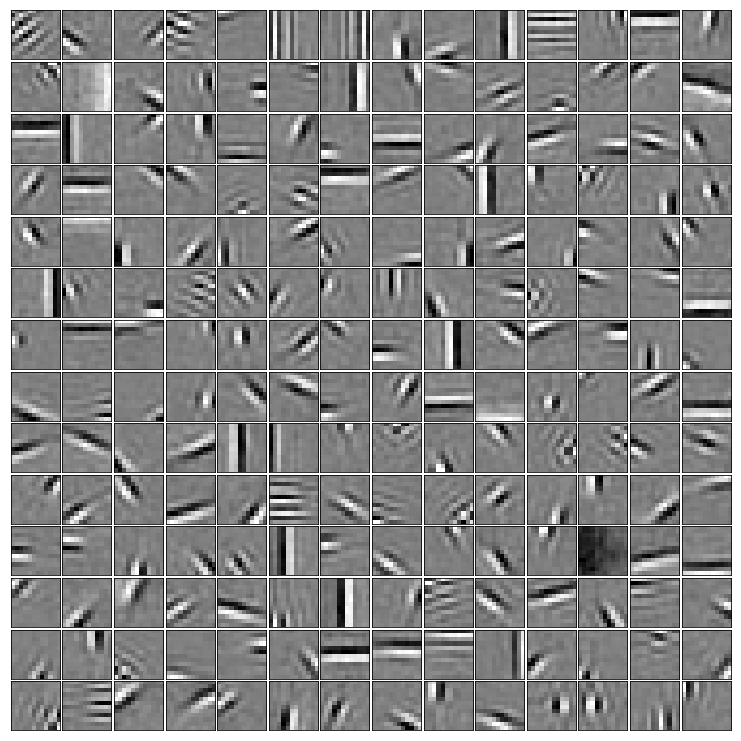

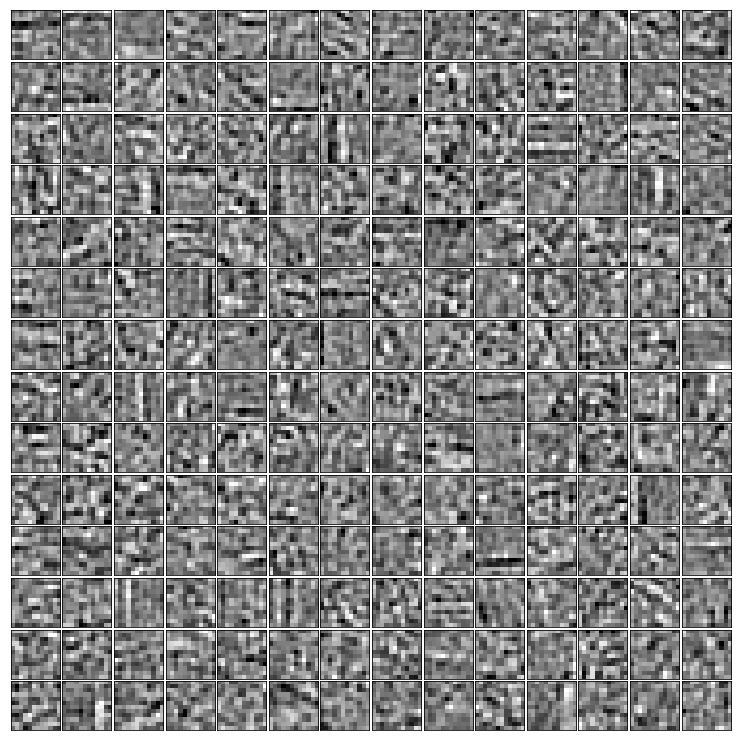

In [6]:
shl = SHL()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=0,
              learning_algorithm='mp', eta=eta, verbose=verbose)
    dico = shl.learn_dico()
    _ = shl.show_dico(dico)

## Version used

In [7]:
import version_information
%version_information numpy, shl_scripts